In [247]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


## Load the CSV into df (file name: DataOnly)

In [248]:
#b Read the CSV file into a DataFrame called df
df = pd.read_csv("DataOnly.csv")


In [249]:
# Quick check: show the first 5 rows
df.head()


,yyyy,mm,tmax degC,tmin degC,af days,rain mm,sun hours
0,1941,1,NaN,NaN,NaN,74.7,NaN
1,1941,2,NaN,NaN,NaN,69.1,NaN
2,1941,3,NaN,NaN,NaN,76.2,NaN
3,1941,4,NaN,NaN,NaN,33.7,NaN
4,1941,5,NaN,NaN,NaN,51.3,NaN


In [250]:
# Quick check: show the bottom 5 rows
df.tail()

,yyyy,mm,tmax degC,tmin degC,af days,rain mm,sun hours
1015,2025,8,20.6,13.7,0.0,39.2,199.7#
1016,2025,9,16.6,10.6,0.0,158.8,141.0#
1017,2025,10,13.7,9.6,0.0,94.4,46.0#
1018,2025,11,11.6,7.3,1.0,167.2,55.1#
1019,2025,12,9.4,5.4,0.0,123.2,64.9#


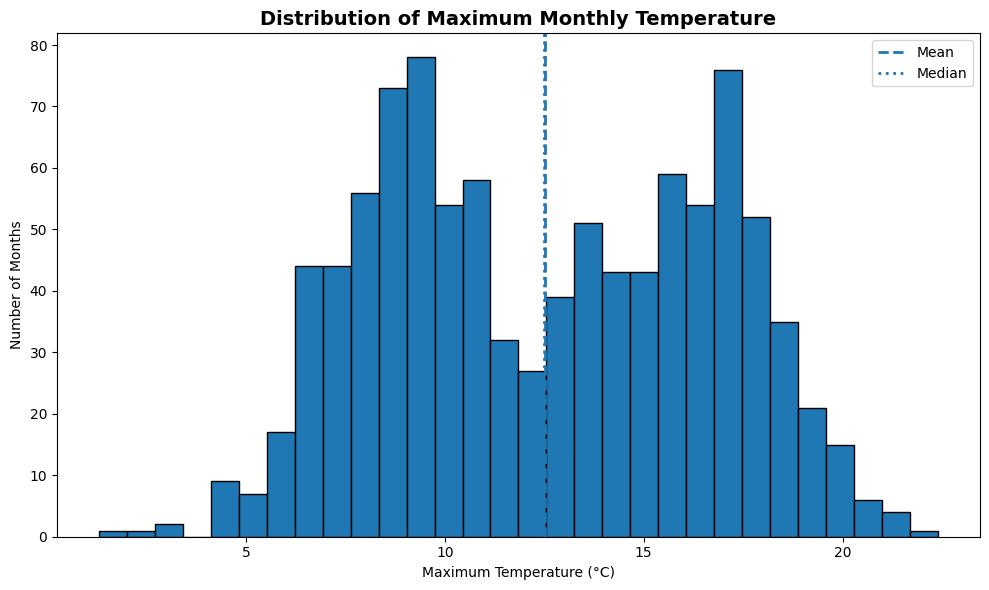

In [251]:
df = pd.read_csv("DataOnly.csv")

# Select and clean the data
tmax = df["tmax degC"].dropna()

# Create the plot
plt.figure(figsize=(10, 6))

# Histogram with improved binning
plt.hist(tmax, bins=30, edgecolor="black")

# Add reference lines
plt.axvline(tmax.mean(), linestyle="--", linewidth=2, label="Mean")
plt.axvline(tmax.median(), linestyle=":", linewidth=2, label="Median")

# Titles and labels
plt.title("Distribution of Maximum Monthly Temperature", fontsize=14, weight="bold")
plt.xlabel("Maximum Temperature (°C)")
plt.ylabel("Number of Months")

# Legend
plt.legend()

# Improve spacing
plt.tight_layout()

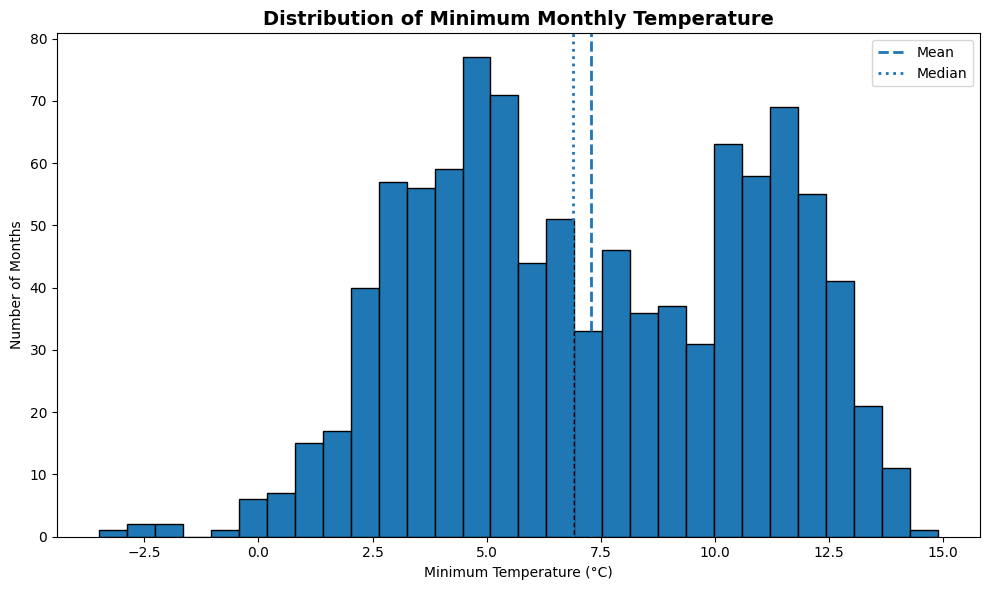

In [252]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("DataOnly.csv")

# Select minimum temperature values and remove missing data
tmin = df["tmin degC"].dropna()

# Create the plot
plt.figure(figsize=(10, 6))

# Histogram
plt.hist(tmin, bins=30, edgecolor="black")

# Add mean and median reference lines
plt.axvline(tmin.mean(), linestyle="--", linewidth=2, label="Mean")
plt.axvline(tmin.median(), linestyle=":", linewidth=2, label="Median")

# Titles and labels
plt.title("Distribution of Minimum Monthly Temperature", fontsize=14, weight="bold")
plt.xlabel("Minimum Temperature (°C)")
plt.ylabel("Number of Months")

# Legend
plt.legend()

# Improve spacing
plt.tight_layout()

plt.show()


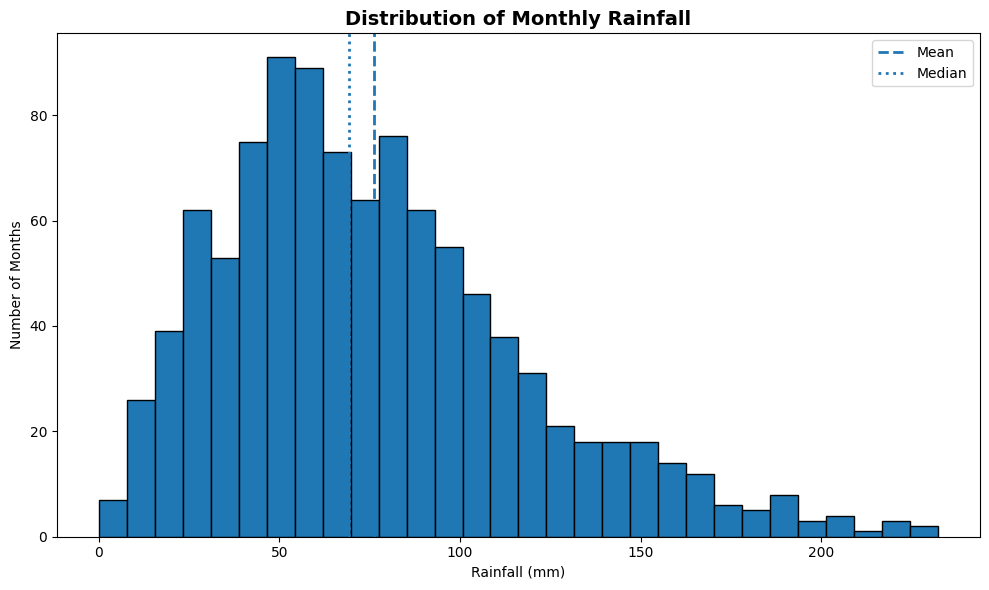

In [253]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("DataOnly.csv")

# Select rainfall data and remove missing values
rain = df["rain mm"].dropna()

# Create the plot
plt.figure(figsize=(10, 6))

# Histogram
plt.hist(rain, bins=30, edgecolor="black")

# Add reference lines for context
plt.axvline(rain.mean(), linestyle="--", linewidth=2, label="Mean")
plt.axvline(rain.median(), linestyle=":", linewidth=2, label="Median")

# Titles and labels
plt.title("Distribution of Monthly Rainfall", fontsize=14, weight="bold")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Number of Months")

# Legend
plt.legend()

# Improve spacing
plt.tight_layout()

plt.show()


## Confirm column names and structure of Dataset

In [254]:
# Show column names exactly as Python sees them
df.columns

Index(['yyyy', 'mm', 'tmax degC', 'tmin degC', 'af days', 'rain mm',
       'sun hours'],
      dtype='object')

In [255]:
# Show the data types and missing values count
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   yyyy       1020 non-null   int64  
 1   mm         1020 non-null   int64  
 2   tmax degC  1002 non-null   float64
 3   tmin degC  1008 non-null   float64
 4   af days    828 non-null    float64
 5   rain mm    1020 non-null   float64
 6   sun hours  1006 non-null   object 
dtypes: float64(4), int64(2), object(1)
memory usage: 55.9+ KB


## Convert measurement columns to text (strings)

#### Some measurement columns can contain extra symbols like *, #, blanks, or ---. Converting them to strings first (and trimming spaces) makes the cleaning and flag checks reliable and prevents type errors.

In [256]:
# These columns may contain markers like '*', '#', '---'
# Convert to string so we can detect and remove symbols safely
value_cols = ["tmax degC", "tmin degC", "af days", "rain mm", "sun hours"]

for c in value_cols:
    if c in df.columns:
        df[c] = df[c].astype("string").str.strip()


## Create flag columns BEFORE removing symbols

In [257]:
# Estimated flags: True if the cell contains '*'

df["tmax degC_estimated"] = df["tmax degC"].str.contains(r"\*", na=False)
df["tmin degC_estimated"] = df["tmin degC"].str.contains(r"\*", na=False)
df["af days _estimated"]  = df["af days"].str.contains(r"\*", na=False)
df["rain mm _estimated"]  = df["rain mm"].str.contains(r"\*", na=False)
df["sun hours _estimated"]= df["sun hours"].str.contains(r"\*", na=False)

# 2) Sunshine source flag: True if sunshine value contains '#'
df["sun hours_kipp_zonen"] = df["sun hours"].str.contains(r"#", na=False)

In [258]:
df.head()

,yyyy,mm,tmax degC,tmin degC,af days,rain mm,sun hours,tmax degC_estimated,tmin degC_estimated,af days _estimated,rain mm _estimated,sun hours _estimated,sun hours_kipp_zonen
0,1941,1,<NA>,<NA>,<NA>,74.7,<NA>,False,False,False,False,False,False
1,1941,2,<NA>,<NA>,<NA>,69.1,<NA>,False,False,False,False,False,False
2,1941,3,<NA>,<NA>,<NA>,76.2,<NA>,False,False,False,False,False,False
3,1941,4,<NA>,<NA>,<NA>,33.7,<NA>,False,False,False,False,False,False
4,1941,5,<NA>,<NA>,<NA>,51.3,<NA>,False,False,False,False,False,False


## Convert --- and blanks to missing values, remove * and #, then convert to numbers

In [259]:
def clean_numeric_series(s: pd.Series) -> pd.Series:
    
    s = s.astype("string").str.strip()

    # Convert known missing markers to NA
    s = s.replace(["---", ""], pd.NA)

    # Remove special markers (we already saved them in flag columns)
    s = s.str.replace("*", "", regex=False)
    s = s.str.replace("#", "", regex=False)

    # Convert to numeric; anything invalid becomes NaN
    return pd.to_numeric(s, errors="coerce")

# Apply cleaning to each measurement column
for c in value_cols:
    df[c] = clean_numeric_series(df[c])


In [260]:
df.tail()

,yyyy,mm,tmax degC,tmin degC,af days,rain mm,sun hours,tmax degC_estimated,tmin degC_estimated,af days _estimated,rain mm _estimated,sun hours _estimated,sun hours_kipp_zonen
1015,2025,8,20.6,13.7,0.0,39.2,199.7,False,False,False,False,False,True
1016,2025,9,16.6,10.6,0.0,158.8,141.0,False,False,False,False,False,True
1017,2025,10,13.7,9.6,0.0,94.4,46.0,False,False,False,False,False,True
1018,2025,11,11.6,7.3,1.0,167.2,55.1,False,False,False,False,False,True
1019,2025,12,9.4,5.4,0.0,123.2,64.9,False,False,False,False,False,True


## Create a proper monthly date

In [261]:
# Ensure year and month are numeric
df["yyyy"] = pd.to_numeric(df["yyyy"], errors="coerce").astype("Int64")
df["mm"]   = pd.to_numeric(df["mm"], errors="coerce").astype("Int64")


In [262]:
# Create a date column as the first day of each month
df["date"] = pd.to_datetime(
    dict(year=df["yyyy"].astype(int), month=df["mm"].astype(int), day=1),
    errors="coerce"
)

In [263]:
# Sort in time order and set date as index
df = df.sort_values("date").set_index("date")


In [264]:
df.head()

,yyyy,mm,tmax degC,tmin degC,af days,rain mm,sun hours,tmax degC_estimated,tmin degC_estimated,af days _estimated,rain mm _estimated,sun hours _estimated,sun hours_kipp_zonen
date,,,,,,,,,,,,,
1941-01-01,1941,1,<NA>,<NA>,<NA>,74.7,<NA>,False,False,False,False,False,False
1941-02-01,1941,2,<NA>,<NA>,<NA>,69.1,<NA>,False,False,False,False,False,False
1941-03-01,1941,3,<NA>,<NA>,<NA>,76.2,<NA>,False,False,False,False,False,False
1941-04-01,1941,4,<NA>,<NA>,<NA>,33.7,<NA>,False,False,False,False,False,False
1941-05-01,1941,5,<NA>,<NA>,<NA>,51.3,<NA>,False,False,False,False,False,False


## Create derived metrics for clearer reporting

In [265]:
# Average temperature
df["tmean degC"] = df[["tmax degC", "tmin degC"]].mean(axis=1)

# Temperature range 
df["trange degC"] = df["tmax degC"] - df["tmin degC"]

# year and month fields
df["year"] = df.index.year
df["month"] = df.index.month


In [266]:
df["tmean degC"]

date
1941-01-01     <NA>
1941-02-01     <NA>
1941-03-01     <NA>
1941-04-01     <NA>
1941-05-01     <NA>
              ...  
2025-08-01    17.15
2025-09-01     13.6
2025-10-01    11.65
2025-11-01     9.45
2025-12-01      7.4
Name: tmean degC, Length: 1020, dtype: Float64

In [267]:
df["trange degC"]

date
1941-01-01    <NA>
1941-02-01    <NA>
1941-03-01    <NA>
1941-04-01    <NA>
1941-05-01    <NA>
              ... 
2025-08-01     6.9
2025-09-01     6.0
2025-10-01     4.1
2025-11-01     4.3
2025-12-01     4.0
Name: trange degC, Length: 1020, dtype: Float64

In [268]:
df.head()

,yyyy,mm,tmax degC,tmin degC,af days,rain mm,sun hours,tmax degC_estimated,tmin degC_estimated,af days _estimated,rain mm _estimated,sun hours _estimated,sun hours_kipp_zonen,tmean degC,trange degC,year,month
date,,,,,,,,,,,,,,,,,
1941-01-01,1941,1,<NA>,<NA>,<NA>,74.7,<NA>,False,False,False,False,False,False,<NA>,<NA>,1941,1
1941-02-01,1941,2,<NA>,<NA>,<NA>,69.1,<NA>,False,False,False,False,False,False,<NA>,<NA>,1941,2
1941-03-01,1941,3,<NA>,<NA>,<NA>,76.2,<NA>,False,False,False,False,False,False,<NA>,<NA>,1941,3
1941-04-01,1941,4,<NA>,<NA>,<NA>,33.7,<NA>,False,False,False,False,False,False,<NA>,<NA>,1941,4
1941-05-01,1941,5,<NA>,<NA>,<NA>,51.3,<NA>,False,False,False,False,False,False,<NA>,<NA>,1941,5


## Data quality checks (missing values + marker flags)

In [269]:
# % missing in each key metric
missing_pct = df[["tmax degC","tmin degC","tmean degC","af days","rain mm","sun hours"]].isna().mean() * 100
missing_pct.sort_values(ascending=False)


af days       18.823529
tmax degC      1.764706
sun hours      1.372549
tmin degC      1.176471
tmean degC     1.176471
rain mm        0.000000
dtype: float64

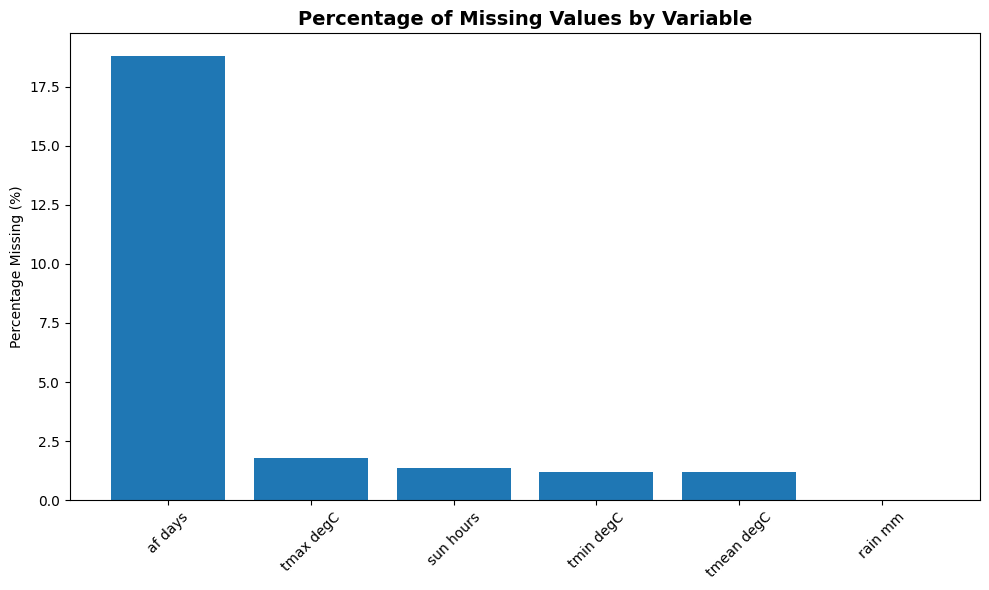

In [294]:
import matplotlib.pyplot as plt

# Missing values percentage (already calculated)
missing_pct = missing_pct.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(missing_pct.index, missing_pct.values)
plt.title("Percentage of Missing Values by Variable", fontsize=14, weight="bold")
plt.ylabel("Percentage Missing (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


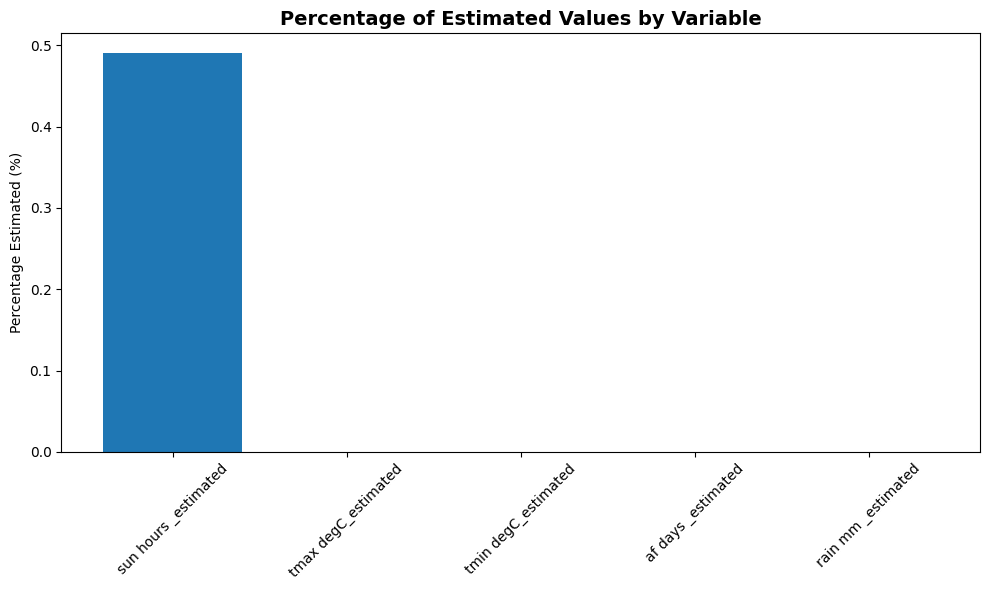

In [295]:
# Estimated values percentage (already calculated)
estimated_pct = estimated_pct.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(estimated_pct.index, estimated_pct.values)
plt.title("Percentage of Estimated Values by Variable", fontsize=14, weight="bold")
plt.ylabel("Percentage Estimated (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [270]:
# % estimated values from flags (*)
estimated_pct = df[
    ["tmax degC_estimated","tmin degC_estimated","af days _estimated","rain mm _estimated","sun hours _estimated"]
].mean() * 100
estimated_pct.sort_values(ascending=False)


sun hours _estimated    0.490196
tmax degC_estimated          0.0
tmin degC_estimated          0.0
af days _estimated           0.0
rain mm _estimated           0.0
dtype: Float64

In [271]:
# Sunshine instrument split
df["sun hours_kipp_zonen"].value_counts(dropna=False)


sun hours_kipp_zonen
False    730
True     290
Name: count, dtype: Int64

#### Interpretation

290 rows of sunshine values contain # and 
730 rows do not contain #.

In [272]:
COLORS = {
    "green": "#2E7D32",
    "gold_orange": "#F9A825",
    "brown": "#6D4C41",
    "milk": "#FFF8E1",
    "blue": "#1E88E5",
    "pink": "#D81B60"
}


### Shows the typical seasonal cycle by averaging daily mean temperature across all years for each month.


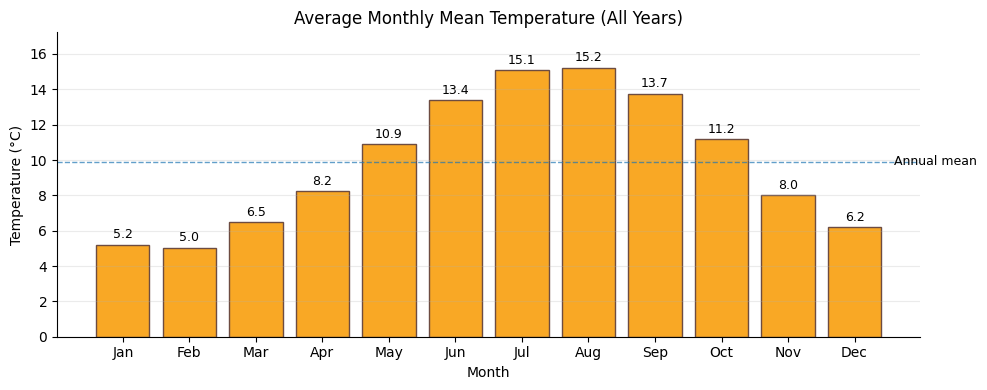

In [273]:
import matplotlib.pyplot as plt

month_names = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

seasonal_temp = df.groupby("month")["tmean degC"].mean()

plt.figure(figsize=(10,4))
bars = plt.bar(
    seasonal_temp.index,
    seasonal_temp.values,
    color=COLORS["gold_orange"],
    edgecolor=COLORS["brown"],
    linewidth=1
)

plt.title("Average Monthly Mean Temperature (All Years)")
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")

plt.xticks(range(1,13), month_names)
plt.ylim(0, max(seasonal_temp.values) + 2)

# Add value labels
for b in bars:
    h = b.get_height()
    plt.text(b.get_x() + b.get_width()/2, h + 0.2, f"{h:.1f}", ha="center", va="bottom", fontsize=9)

# Optional: annual mean reference line
annual_mean = df["tmean degC"].mean()
plt.axhline(annual_mean, linestyle="--", linewidth=1, alpha=0.7)
plt.text(12.6, annual_mean, "Annual mean", va="center", fontsize=9)

# Clean look
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.grid(axis="y", alpha=0.25)

plt.tight_layout()
plt.show()



### Annual temperature trend over time

In [274]:

# Yearly average of daily mean temperature (tmean). This removes seasonality and highlights long-term change.


Last year in annual_temp: 2025
year
2021    10.441667
2022       11.175
2023    11.258333
2024    10.720833
2025    11.179167
Name: tmean degC, dtype: Float64


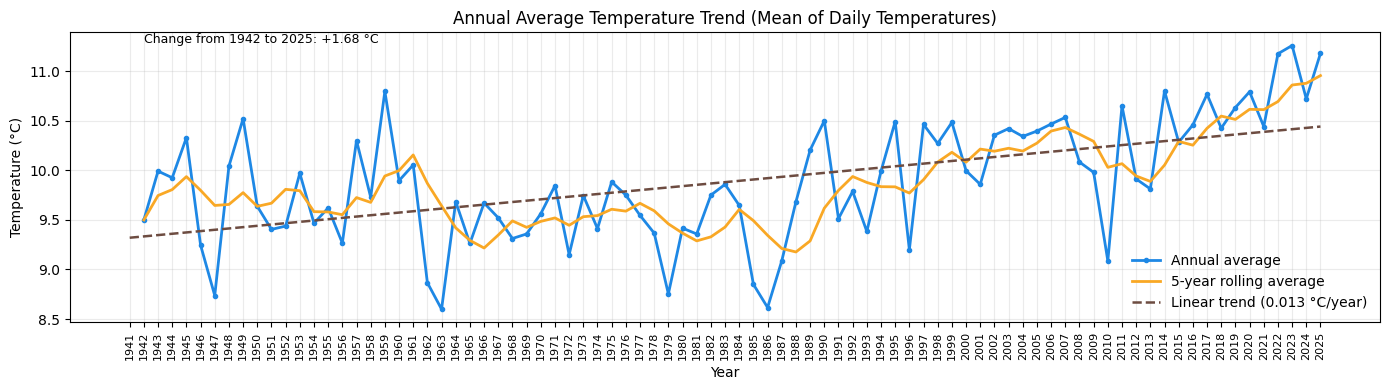

In [275]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Create annual averages (one value per year)mj ú,kmji9                                                                                                                                             
annual_temp = df.groupby("year")["tmean degC"].mean().sort_index()

# Quick check: confirm the last year in the series (should be 2025 if present)
print("Last year in annual_temp:", int(annual_temp.index.max()))
print(annual_temp.tail(5))

# Step 2: Smooth short-term ups/downs (optional but useful for storytelling)
rolling_5y = annual_temp.rolling(5, min_periods=1).mean()

# Step 3: Fit a linear trend safely (polyfit fails if NaN/inf exist)
annual_temp_fit = annual_temp.replace([np.inf, -np.inf], np.nan).dropna()

x = annual_temp_fit.index.to_numpy(dtype=float)
y = annual_temp_fit.to_numpy(dtype=float)

# Center x for numerical stability
x_centered = x - x.mean()
m, b0 = np.polyfit(x_centered, y, 1)  # slope, intercept (centered)

# Build a trend line across ALL years (including 2025 if present)
trend = m * (annual_temp.index.to_numpy(dtype=float) - x.mean()) + b0

# Step 4: Plot (force ALL years to display, including 2025)
plt.figure(figsize=(14, 4))

# Annual averages
plt.plot(
    annual_temp.index, annual_temp.values,
    color=COLORS["blue"], linewidth=2, marker="o", markersize=3,
    label="Annual average"
)

# 5-year rolling average
plt.plot(
    rolling_5y.index, rolling_5y.values,
    color=COLORS["gold_orange"], linewidth=2,
    label="5-year rolling average"
)

# Linear trend line
plt.plot(
    annual_temp.index, trend,
    color=COLORS["brown"], linewidth=1.8, linestyle="--",
    label=f"Linear trend ({m:.3f} °C/year)"
)

# Professional touch: overall change from first to last available year (should be 2025 if present)
first_year = int(annual_temp_fit.index.min())
last_year  = int(annual_temp_fit.index.max())
delta = float(annual_temp_fit.loc[last_year] - annual_temp_fit.loc[first_year])

y_pos = np.nanmax([annual_temp.max(), rolling_5y.max()])
plt.text(
    first_year, y_pos,
    f"Change from {first_year} to {last_year}: {delta:+.2f} °C",
    fontsize=9, va="bottom"
)

plt.title("Annual Average Temperature Trend (Mean of Daily Temperatures)")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")

# Force every year label to show (including 2025)
all_years = annual_temp.index.astype(int)
plt.xticks(all_years, rotation=90, fontsize=8)

plt.grid(alpha=0.25)
plt.legend(frameon=False)
plt.tight_layout()
plt.show()


In [276]:
first_year = int(annual_temp_fit.index.min())
last_year  = int(annual_temp_fit.index.max())
delta = float(annual_temp_fit.loc[last_year] - annual_temp_fit.loc[first_year])


In [277]:
delta

1.6791666666666671

## Annual Total Rainfall Trend (Sum of Daily Rainfall)

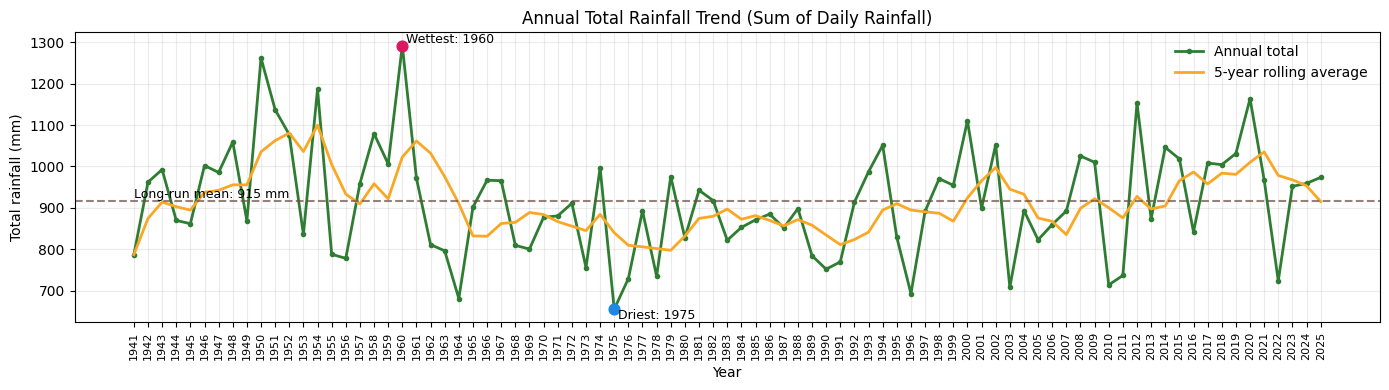

In [278]:
import numpy as np
import matplotlib.pyplot as plt

# Sums daily rainfall to annual totals to show long-term wet/dry variability and highlight unusually wet or dry years.
annual_rain = df.groupby("year")["rain mm"].sum().sort_index()

# Rolling mean to smooth year-to-year swings
rolling_5y = annual_rain.rolling(5, min_periods=1).mean()

# Long-term average (baseline)
long_run_mean = annual_rain.mean()

# Identify wettest and driest years
wettest_year = int(annual_rain.idxmax())
driest_year  = int(annual_rain.idxmin())

plt.figure(figsize=(14, 4))

# Annual totals
plt.plot(
    annual_rain.index, annual_rain.values,
    color=COLORS["green"], linewidth=2, marker="o", markersize=3,
    label="Annual total"
)

# Smoothed line
plt.plot(
    rolling_5y.index, rolling_5y.values,
    color=COLORS["gold_orange"], linewidth=2,
    label="5-year rolling average"
)

# Long-run mean line
plt.axhline(long_run_mean, linestyle="--", linewidth=1.5, alpha=0.7, color=COLORS["brown"])
plt.text(
    annual_rain.index.min(), long_run_mean,
    f"Long-run mean: {long_run_mean:.0f} mm",
    va="bottom", fontsize=9
)

# Callouts (wettest/driest)
plt.scatter([wettest_year], [annual_rain.loc[wettest_year]], s=60, color=COLORS["pink"], zorder=3)
plt.scatter([driest_year],  [annual_rain.loc[driest_year]],  s=60, color=COLORS["blue"], zorder=3)

plt.text(wettest_year, annual_rain.loc[wettest_year], f" Wettest: {wettest_year}", fontsize=9, va="bottom")
plt.text(driest_year,  annual_rain.loc[driest_year],  f" Driest: {driest_year}",  fontsize=9, va="top")

plt.title("Annual Total Rainfall Trend (Sum of Daily Rainfall)")
plt.xlabel("Year")
plt.ylabel("Total rainfall (mm)")

# Show all years
all_years = annual_rain.index.astype(int)
plt.xticks(all_years, rotation=90, fontsize=8)

plt.grid(alpha=0.25)
plt.legend(frameon=False)
plt.tight_layout()
plt.show()


## Temperature vs Sunshine Relationship

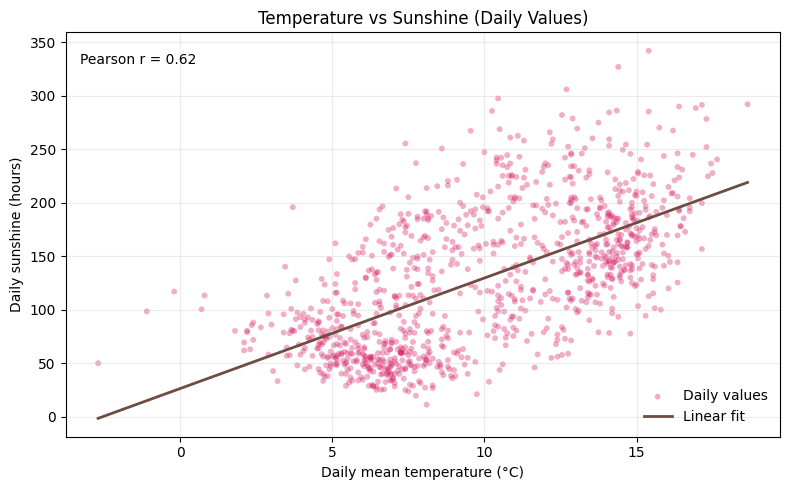

In [279]:
# Scatter plot of daily mean temperature against daily sunshine hours to show whether warmer days tend to be sunnier.
plot_data = df[["tmean degC", "sun hours"]].dropna()

x = plot_data["tmean degC"].to_numpy(dtype=float)
y = plot_data["sun hours"].to_numpy(dtype=float)

# Correlation (Pearson)
r = np.corrcoef(x, y)[0, 1]

plt.figure(figsize=(8, 5))

# Scatter
plt.scatter(x, y, color=COLORS["pink"], alpha=0.35, s=18, edgecolors="none", label="Daily values")

# Trend line (simple linear fit)
m, b = np.polyfit(x, y, 1)
x_line = np.linspace(x.min(), x.max(), 200)
y_line = m * x_line + b
plt.plot(x_line, y_line, color=COLORS["brown"], linewidth=2, label="Linear fit")

plt.title("Temperature vs Sunshine (Daily Values)")
plt.xlabel("Daily mean temperature (°C)")
plt.ylabel("Daily sunshine (hours)")
plt.grid(alpha=0.25)
plt.legend(frameon=False)

# Add correlation text
plt.text(
    0.02, 0.95,
    f"Pearson r = {r:.2f}",
    transform=plt.gca().transAxes,
    fontsize=10, va="top"
)

plt.tight_layout()
plt.show()


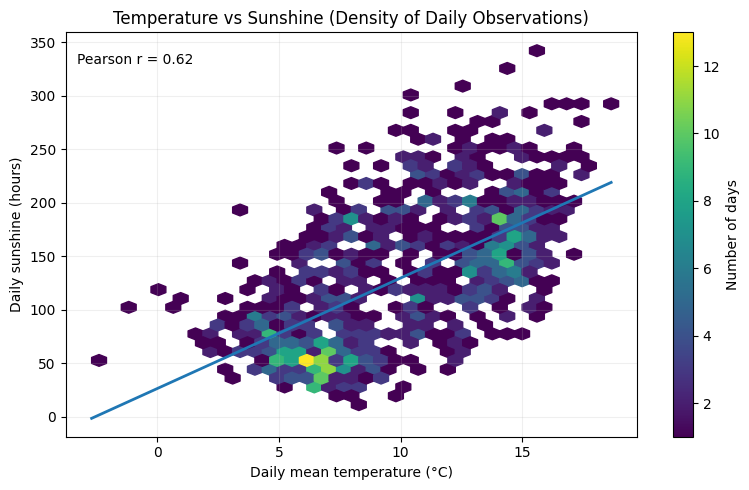

In [280]:
# Hexbin shows point density (where most days cluster), making the temperature–sunshine relationship clearer than a scatter.
plot_data = df[["tmean degC", "sun hours"]].dropna()
x = plot_data["tmean degC"].to_numpy(dtype=float)
y = plot_data["sun hours"].to_numpy(dtype=float)

# Correlation (optional label)
r = np.corrcoef(x, y)[0, 1]

plt.figure(figsize=(8, 5))

hb = plt.hexbin(x, y, gridsize=35, mincnt=1)  # density bins
plt.colorbar(hb, label="Number of days")

# Optional: simple trend line
m, b = np.polyfit(x, y, 1)
x_line = np.linspace(x.min(), x.max(), 200)
plt.plot(x_line, m * x_line + b, linewidth=2)

plt.title("Temperature vs Sunshine (Density of Daily Observations)")
plt.xlabel("Daily mean temperature (°C)")
plt.ylabel("Daily sunshine (hours)")
plt.grid(alpha=0.2)

plt.text(0.02, 0.95, f"Pearson r = {r:.2f}", transform=plt.gca().transAxes, va="top")
plt.tight_layout()
plt.show()


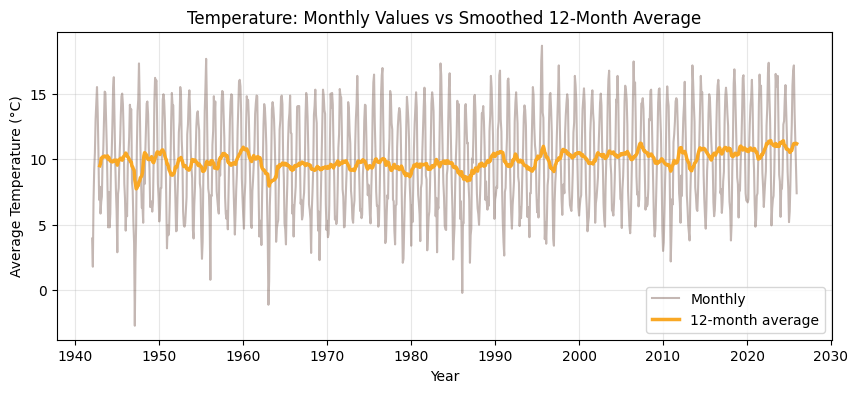

In [281]:
df["tmean degC_12m_avg"] = df["tmean degC"].rolling(12).mean()

plt.figure(figsize=(10,4))
plt.plot(df.index, df["tmean degC"], color=COLORS["brown"], alpha=0.4, label="Monthly")
plt.plot(df.index, df["tmean degC_12m_avg"], color=COLORS["gold_orange"], linewidth=2.5, label="12-month average")
plt.title("Temperature: Monthly Values vs Smoothed 12-Month Average")
plt.xlabel("Year")
plt.ylabel("Average Temperature (°C)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


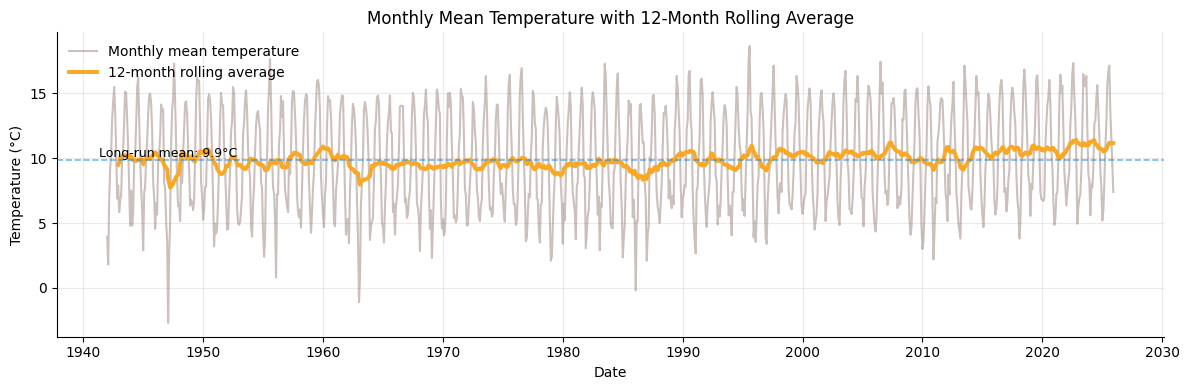

In [282]:
import matplotlib.pyplot as plt
import numpy as np

# Plots monthly mean temperature alongside a 12-month rolling average to reduce seasonal noise and show the underlying trend.
df["tmean degC_12m_avg"] = df["tmean degC"].rolling(12, min_periods=12).mean()

plt.figure(figsize=(12, 4))

# Monthly series (lighter)
plt.plot(
    df.index, df["tmean degC"],
    color=COLORS["brown"], alpha=0.35, linewidth=1.5,
    label="Monthly mean temperature"
)

# 12-month rolling average (emphasised)
plt.plot(
    df.index, df["tmean degC_12m_avg"],
    color=COLORS["gold_orange"], linewidth=2.8,
    label="12-month rolling average"
)

# Optional: long-run mean baseline for context
long_run_mean = df["tmean degC"].mean()
plt.axhline(long_run_mean, linestyle="--", linewidth=1.2, alpha=0.6, color=COLORS["blue"])
plt.text(df.index.min(), long_run_mean, f" Long-run mean: {long_run_mean:.1f}°C", va="bottom", fontsize=9)

plt.title("Monthly Mean Temperature with 12-Month Rolling Average")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.grid(alpha=0.25)

# Clean up chart frame
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.legend(frameon=False, loc="upper left")
plt.tight_layout()
plt.show()


In [283]:
ts = df["tmean degC"].dropna()  # drop missing values so the model has clean numbers


In [284]:
forecast_horizon = 12

# Future monthly dates (month-start)
future_index = pd.date_range(
    start=ts.index.max() + pd.offsets.MonthBegin(1),
    periods=forecast_horizon,
    freq="MS"
)

# Seasonal naive: repeat the last 12 observed monthly values
last_12 = ts.iloc[-12:]
forecast = pd.Series(last_12.values, index=future_index, name="tmean degC_forecast")

forecast


2026-01-01      5.2
2026-02-01      6.0
2026-03-01      8.0
2026-04-01     10.8
2026-05-01    12.55
2026-06-01     15.6
2026-07-01    16.75
2026-08-01    17.15
2026-09-01     13.6
2026-10-01    11.65
2026-11-01     9.45
2026-12-01      7.4
Freq: MS, Name: tmean degC_forecast, dtype: Float64

In [285]:
ts = df["tmean degC"].dropna()  # drop missing values so the model has clean numbers


In [286]:
forecast_horizon = 12

# Future monthly dates (month-start)
future_index = pd.date_range(
    start=ts.index.max() + pd.offsets.MonthBegin(1),
    periods=forecast_horizon,
    freq="MS"
)

# Seasonal naive: repeat the last 12 observed monthly values
last_12 = ts.iloc[-12:]
forecast = pd.Series(last_12.values, index=future_index, name="tmean degC_forecast")

forecast


2026-01-01      5.2
2026-02-01      6.0
2026-03-01      8.0
2026-04-01     10.8
2026-05-01    12.55
2026-06-01     15.6
2026-07-01    16.75
2026-08-01    17.15
2026-09-01     13.6
2026-10-01    11.65
2026-11-01     9.45
2026-12-01      7.4
Freq: MS, Name: tmean degC_forecast, dtype: Float64

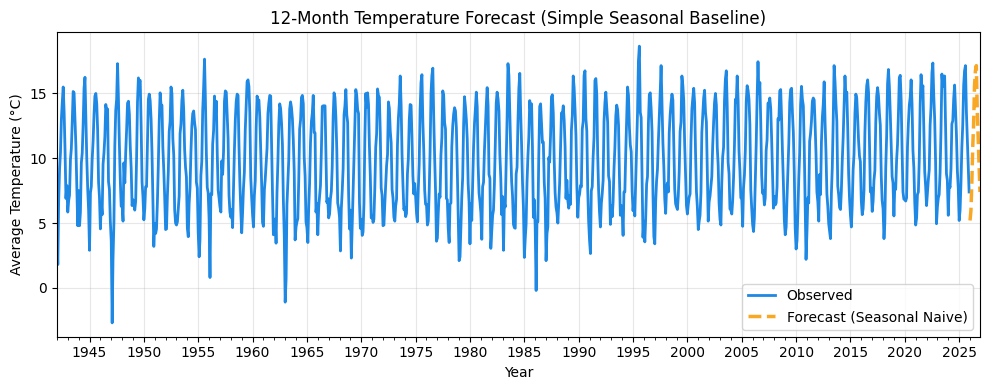

In [287]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(10, 4))

# ✅ Plot using explicit x (dates) and y (values)
ax.plot(ts.index, ts.values, color=COLORS["blue"], linewidth=2, label="Observed")
ax.plot(forecast.index, forecast.values, color=COLORS["gold_orange"], linewidth=2.5,
        linestyle="--", label="Forecast (Seasonal Naive)")

ax.set_title("12-Month Temperature Forecast (Simple Seasonal Baseline)")
ax.set_xlabel("Year")
ax.set_ylabel("Average Temperature (°C)")
ax.legend()
ax.grid(alpha=0.3)

# ✅ Force axis to be date-aware and show 5-year ticks
ax.set_xlim(ts.index.min(), forecast.index.max())
ax.xaxis.set_major_locator(mdates.YearLocator(5))             # every 5 years
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))      # show year
ax.xaxis.set_minor_locator(mdates.YearLocator(1))             # minor ticks yearly

plt.tight_layout()
plt.show()


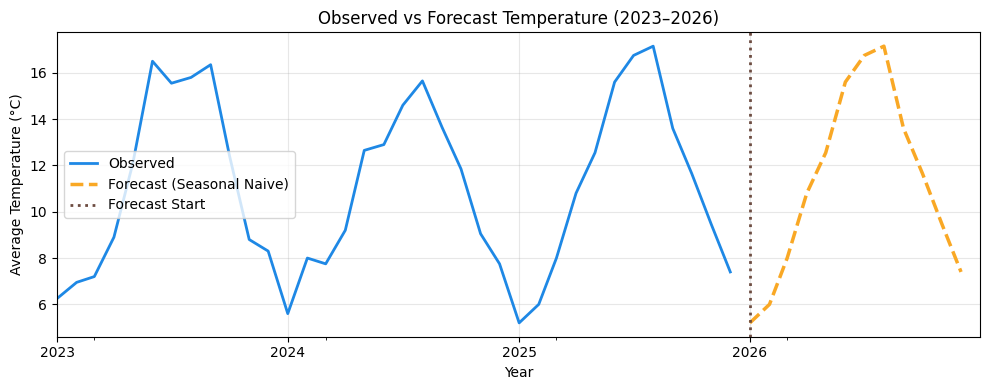

In [288]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# ---- Define zoom window ----
start_date = pd.Timestamp("2023-01-01")
end_date   = pd.Timestamp("2026-12-31")

# ---- Create figure ----
fig, ax = plt.subplots(figsize=(10, 4))

# ---- Plot observed data (restricted to 2023 onward) ----
ts_zoom = ts.loc[start_date:]
ax.plot(
    ts_zoom.index,
    ts_zoom.values,
    color=COLORS["blue"],
    linewidth=2,
    label="Observed"
)

# ---- Plot forecast ----
ax.plot(
    forecast.index,
    forecast.values,
    color=COLORS["gold_orange"],
    linewidth=2.5,
    linestyle="--",
    label="Forecast (Seasonal Naive)"
)

# ---- Vertical line to mark forecast start ----
ax.axvline(
    forecast.index.min(),
    color=COLORS["brown"],
    linestyle=":",
    linewidth=2,
    label="Forecast Start"
)

# ---- Formatting ----
ax.set_title("Observed vs Forecast Temperature (2023–2026)")
ax.set_xlabel("Year")
ax.set_ylabel("Average Temperature (°C)")
ax.legend()
ax.grid(alpha=0.3)

# ---- X-axis formatting ----
ax.set_xlim(start_date, end_date)
ax.xaxis.set_major_locator(mdates.YearLocator(1))          # every year
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.xaxis.set_minor_locator(mdates.MonthLocator(3))         # every 3 months

plt.tight_layout()
plt.show()


In [289]:
# Compare each month to the same month one year earlier
one_year_shift = ts.shift(12)

# Keep only months where both values exist
aligned = pd.DataFrame({"actual": ts, "last_year": one_year_shift}).dropna()

# RMSE = typical forecast error size
rmse = np.sqrt(np.mean((aligned["actual"] - aligned["last_year"])**2))
rmse


np.float64(1.6627904221373804)

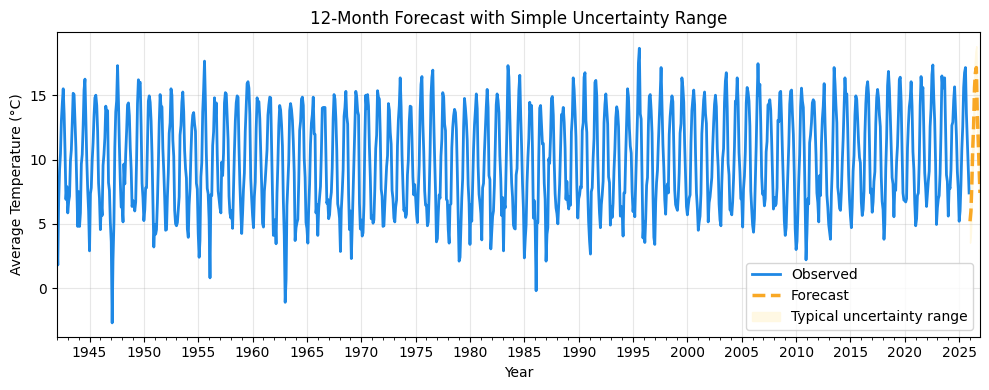

In [292]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Build an uncertainty band around the forecast
upper = forecast + rmse
lower = forecast - rmse

fig, ax = plt.subplots(figsize=(10, 4))

# ✅ Plot using explicit x (dates) and y (values) so the axis is date-aware
ax.plot(ts.index, ts.values, color=COLORS["blue"], linewidth=2, label="Observed")
ax.plot(forecast.index, forecast.values, color=COLORS["gold_orange"],
        linewidth=2.5, linestyle="--", label="Forecast")

# ✅ Uncertainty band (use the forecast index for x)
ax.fill_between(forecast.index, lower.values, upper.values,
                color=COLORS["milk"], alpha=0.9, label="Typical uncertainty range")

# Titles and labels
ax.set_title("12-Month Forecast with Simple Uncertainty Range")
ax.set_xlabel("Year")
ax.set_ylabel("Average Temperature (°C)")
ax.legend()
ax.grid(alpha=0.3)

# ✅ Force 5-year ticks on x-axis
ax.set_xlim(ts.index.min(), forecast.index.max())
ax.xaxis.set_major_locator(mdates.YearLocator(5))          # every 5 years
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))   # show year only
ax.xaxis.set_minor_locator(mdates.YearLocator(1))          # minor ticks yearly (optional)

plt.tight_layout()
plt.show()


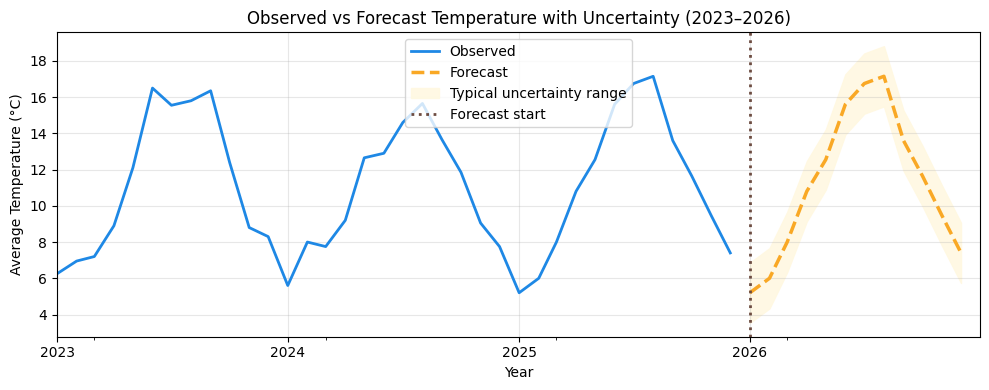

In [293]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# ---- Define zoom window ----
start_date = pd.Timestamp("2023-01-01")
end_date   = pd.Timestamp("2026-12-31")

# ---- Build uncertainty band ----
upper = forecast + rmse
lower = forecast - rmse

# ---- Create figure ----
fig, ax = plt.subplots(figsize=(10, 4))

# ---- Observed data (only from 2023 onwards) ----
ts_zoom = ts.loc[start_date:]
ax.plot(
    ts_zoom.index,
    ts_zoom.values,
    color=COLORS["blue"],
    linewidth=2,
    label="Observed"
)

# ---- Forecast ----
ax.plot(
    forecast.index,
    forecast.values,
    color=COLORS["gold_orange"],
    linewidth=2.5,
    linestyle="--",
    label="Forecast"
)

# ---- Uncertainty band (forecast only) ----
ax.fill_between(
    forecast.index,
    lower.values,
    upper.values,
    color=COLORS["milk"],
    alpha=0.9,
    label="Typical uncertainty range"
)

# ---- Vertical line to mark forecast start ----
ax.axvline(
    forecast.index.min(),
    color=COLORS["brown"],
    linestyle=":",
    linewidth=2,
    label="Forecast start"
)

# ---- Formatting ----
ax.set_title("Observed vs Forecast Temperature with Uncertainty (2023–2026)")
ax.set_xlabel("Year")
ax.set_ylabel("Average Temperature (°C)")
ax.legend()
ax.grid(alpha=0.3)

# ---- X-axis formatting ----
ax.set_xlim(start_date, end_date)
ax.xaxis.set_major_locator(mdates.YearLocator(1))      # every year
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.xaxis.set_minor_locator(mdates.MonthLocator(3))     # quarterly ticks

plt.tight_layout()
plt.show()

